# ECON 148 - Data Science for Economists

Exploring Economic Data with Python - Looking for Insights in the ETD Dataset 

Kruse, H., E. Mensah, K. Sen, and G. J. de Vries (2022). “A manufacturing renaissance? Industrialization trends in the developing world”, IMF Economic Review DOI: 10.1057/s41308-022-00183-7

License: The GGDC/UNU-WIDER Economic Transformation Database is licensed under a Creative Commons Attribution 4.0 International License.


In [5]:
!pip install pandas
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 10.0 MB/s eta 0:00:00 MB/s eta 0:00:0101


In [6]:
githuburl="https://raw.githubusercontent.com/UCB-Econ-148/econ148-sp25/refs/heads/main/lec/lec2.1/ETD.csv"
ETDdf=pd.read_csv(githuburl, thousands=",")
ETDdf

,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag
0,Argentina,ARG,VA,1990,8317,2710,43779,4175,6444,19510,5723,7538,3118,"3,747",11015,4417,120491,0
1,Argentina,ARG,VA,1991,18048,5130,104598,9189,17712,52132,14934,20373,8429,"10,127",33674,13505,307851,0
2,Argentina,ARG,VA,1992,20187,5595,117573,12033,25485,63450,18577,28097,11624,"13,966",44329,17778,378694,0
3,Argentina,ARG,VA,1993,20859,5868,124614,13787,33096,69000,20634,33559,13883,"16,680",51019,20461,423460,0
4,Argentina,ARG,VA,1994,22466,6355,132515,14605,35366,75152,23342,32498,13445,"16,153",54847,21511,448254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,Zambia,ZMB,EMP,2014,2548,64,207,23,119,763,98,128,19,10,250,236,4465,0
4433,Zambia,ZMB,EMP,2015,2626,62,226,23,138,818,104,138,23,11,251,245,4667,0
4434,Zambia,ZMB,EMP,2016,2712,65,242,20,152,881,109,127,25,13,267,301,4915,0
4435,Zambia,ZMB,EMP,2017,2806,58,234,22,145,855,112,106,23,32,334,280,5009,0


## 1  Sectoral Employment Shares Across Time

Question:
Compute the employment share of each sector (e.g., manufacturing, agriculture, services) for a selected country over time (1990–2018), and visualize how these shares have changed.

Analytic skills involved:
- Grouping by country + sector
- Calculating shares (relative to total employment)
- Line plots with multiple series


** Analyst Question - For China (or another chosen country), plot the employment share of agriculture, manufacturing, and services from 1990 to 2018. How has structural transformation unfolded?**


In [11]:
import matplotlib as plt

ModuleNotFoundError: No module named 'matplotlib'

In [12]:
china_emp = ETDdf[
    (ETDdf["country"] == "China") &
    (ETDdf["var"] == "EMP")
].copy()

In [10]:
china_emp["year", "Agriculture", "Manufacturing", "Government services"]].plot()

SyntaxError: unmatched ']' (3858747730.py, line 1)

In [13]:
china_emp.tail()

,country,cnt,var,year,Agriculture,Mining,Manufacturing,Utilities,Construction,Trade services,Transport services,Business services,Financial services,Real estate,Government services,Other services,Total,War flag,Services
865,China,CHN,EMP,2014,227900,8175,165438,6137,85974,137307,33789,22190,7055,"9,212",49460,19893,772530,0,269694.0
866,China,CHN,EMP,2015,219190,7764,166015,6249,85418,140289,34788,23742,7847,"9,921",52320,20967,774510,0,279953.0
867,China,CHN,EMP,2016,214960,7163,164413,6274,85383,142076,35479,24901,8824,"10,528",54340,21689,776030,0,287309.0
868,China,CHN,EMP,2017,209440,6880,161236,6318,85754,142468,36490,26871,9459,"11,230",57381,22872,776400,0,295541.0
869,China,CHN,EMP,2018,202580,6510,151140,6434,91465,146076,36828,28275,9987,"12,236",61203,23126,775860,0,305495.0


In [14]:
china_emp.loc[:, "Trade services":"Other services"].dtypes


Trade services          int64
Transport services      int64
Business services       int64
Financial services      int64
Real estate            object
Government services     int64
Other services          int64
dtype: object

In [15]:
services = china_emp.loc[:, "Trade services":"Other services"]

services = services.apply(pd.to_numeric, errors="coerce")

china_emp["Services"] = services.sum(axis=1).copy()

/var/folders/wx/mgl11c114vv7vpz1f_b7szwr0000gn/T/ipykernel_63957/3708892551.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_emp["Services"] = services.sum(axis=1).copy()


<Axes: title={'center': 'China: Employment by Sector (1990–2018)'}, xlabel='Year', ylabel='Employment'>

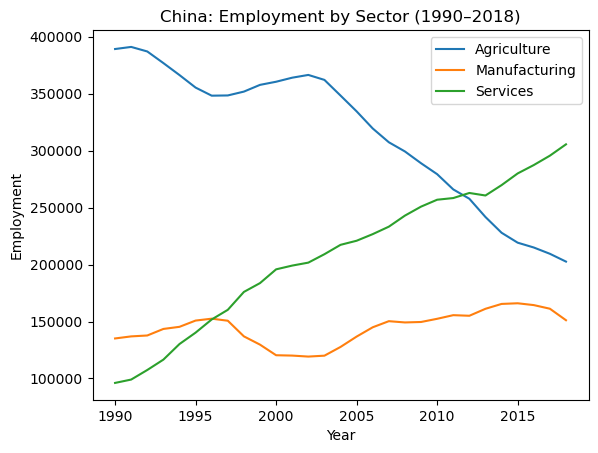

In [16]:
china_emp[
    ["year", "Agriculture", "Manufacturing", "Services"]
].set_index("year").plot(
    title="China: Employment by Sector (1990–2018)",
    ylabel="Employment",
    xlabel="Year"
)

## 2) Value Added vs. Employment: Sector Productivity

Question:
Compute average labor productivity by sector for a country (e.g., value added per employed person) and compare across sectors and over time.

Skills:
- Derived metrics
- Ratio calculations
Faceted plots


**Analyst Question - Calculate value-added per worker for manufacturing and services in Mexico. How do productivity trends differ between these sectors?**